# 词袋模型

## 中文文本

### 读取数据

In [ ]:
import pandas as pd
text_ana_zh = pd.read_excel('text_analysis_weibo_sample.xlsx') # 从文件读入数据
text_ana_zh = text_ana_zh.drop(['Unnamed: 0'], axis=1) # 去除名为'Unnamed: 0'的列
text_ana_zh

,index,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,34121,国债：地产行业重磅利好提振风险偏好，期债低开低走 国债期货全线收跌，10年期主力...,0,0,0,e5df796860e68f403bcf9651bab4d42e,0,0,其他
1,40230,#喜迎二十大 忠诚保平安#,0,0,0,6e35cb69ad52f20de5e28197b2e85306,405444,252,广西
2,7714,注意！事关明日教资考试！福建省教育考试院发布补充公告 福建省2022年下半年全国中小学教师...,0,0,0,e6953217442e6c06a7af23eee5e185f2,53264,2177,福建
3,27378,近日，“千年大计”雄安新区迎来五周岁生日。从“一张白纸...,0,0,0,NaN,0,0,北京
4,15435,樊振东牛逼！,0,0,0,344af41eac516375c04dee6325e763cc,8,51,山东
...,...,...,...,...,...,...,...,...,...
95,14034,老公好漂亮[舔屏],0,0,0,aa7af97ae98cbe8983e559b948ecfabf,825,191,北京
96,35249,恭喜@张小娜呀娜 1名用户获得【小飞T】。C官方唯一抽奖工具@C抽奖平台 对本次抽奖进行监督...,0,0,2,f538513e5801c275cbcf285517a8ee62,51709,20,北京
97,39598,接不动了，居民部门负债率提升空间太有限了。现在动辄几万一平米，总价高，月供高，预期转差，还怎...,0,0,0,2e76c39b6665a0b6f5bdc4c35f36f573,0,59,四川
98,48977,目前电子烟政策已从制定阶段逐渐走向实施阶段，而主要的电子烟公司股价下跌幅度高达70%-...,0,0,0,NaN,0,0,北京


In [ ]:
# Import the 're' module, which provides support for regular expressions
import re

# Define a function named preprocess_text to preprocess the input text
def preprocess_text(text):
    # Convert all characters in the input text to lowercase
    text = text.lower()
    # Use regular expressions to remove all URLs starting with 'http' from the text
    text = re.sub(r'http\S+', '', text)
    # Remove Chinese commas from the text
    text = re.sub(r'，', '', text)
    # Define a set of stop words. Stop words are common words that are usually removed during text processing
    stop_words = set(['to', 'the', 'for', 'and', 'of', 'this', 'in', 'on', 'rt', 'is', 'amp', 'our', 'you', 'we', 'with', 'at'
                      ,'it', 'qt', 'my', 'be', 'that', 'are', 'from', 'as', 'have', 'by', '&amp'])
    # Split the text into words, filter out stop words, and then join the remaining words with a space
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Return the preprocessed text
    return text

In [ ]:
# Import the jieba library, which is used for Chinese word segmentation
import jieba

# Apply the preprocess_text function to each element in the '标题/微博内容' column of the text_ana_zh DataFrame
# This step preprocesses the text in each row, such as converting to lowercase, removing URLs, etc.
text_ana_zh['标题/微博内容'] = text_ana_zh['标题/微博内容'].apply(preprocess_text)

# Define a function named cut_words to perform Chinese word segmentation on the input text
# The function takes a text string as input and uses jieba.cut to segment the text, then joins the segmented words with a space
def cut_words(text):
    return ' '.join(jieba.cut(text))

# Apply the cut_words function to each element in the '标题/微博内容' column of the text_ana_zh DataFrame
# This step segments the preprocessed text in each row and stores the result in the '分词' column
text_ana_zh['分词'] = text_ana_zh['标题/微博内容'].apply(cut_words)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/9x/j_7cm_y109b5sg5tpf7h7gxm0000gn/T/jieba.cache
Loading model cost 0.314 seconds.
Prefix dict has been built successfully.


In [7]:
text_ana_zh

,index,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域,分词
0,34121,国债：地产行业重磅利好提振风险偏好期债低开低走 国债期货全线收跌10年期主力合约跌0.37%...,0,0,0,e5df796860e68f403bcf9651bab4d42e,0,0,其他,国债 ： 地产 行业 重磅 利好 提振 风险 偏好 期债 低开 低 走 国债 期货 全线...
1,40230,#喜迎二十大 忠诚保平安#,0,0,0,6e35cb69ad52f20de5e28197b2e85306,405444,252,广西,# 喜迎 二十大 忠诚 保平安 #
2,7714,注意！事关明日教资考试！福建省教育考试院发布补充公告 福建省2022年下半年全国中小学教师资...,0,0,0,e6953217442e6c06a7af23eee5e185f2,53264,2177,福建,注意 ！ 事关 明日 教资 考试 ！ 福建省 教育 考试院 发布 补充 公告 福建省 2...
3,27378,近日“千年大计”雄安新区迎来五周岁生日。从“一张白纸”到“塔吊林立”雄安新区地上、地下、数字...,0,0,0,NaN,0,0,北京,近日 “ 千年 大计 ” 雄安 新区 迎来 五周岁 生日 。 从 “ 一张白纸 ” 到 “ ...
4,15435,樊振东牛逼！,0,0,0,344af41eac516375c04dee6325e763cc,8,51,山东,樊振东 牛 逼 ！
...,...,...,...,...,...,...,...,...,...,...
95,14034,老公好漂亮[舔屏],0,0,0,aa7af97ae98cbe8983e559b948ecfabf,825,191,北京,老公 好 漂亮 [ 舔 屏 ]
96,35249,恭喜@张小娜呀娜 1名用户获得【小飞t】。c官方唯一抽奖工具@c抽奖平台 对本次抽奖进行监督...,0,0,2,f538513e5801c275cbcf285517a8ee62,51709,20,北京,恭喜 @ 张小娜 呀 娜 1 名 用户 获得 【 小飞 t 】 。 c 官方 唯一 抽奖...
97,39598,接不动了居民部门负债率提升空间太有限了。现在动辄几万一平米总价高月供高预期转差还怎么涨？？？...,0,0,0,2e76c39b6665a0b6f5bdc4c35f36f573,0,59,四川,接不动 了 居民 部门 负债率 提升 空间 太 有限 了 。 现在 动辄 几万 一 平米 总...
98,48977,目前电子烟政策已从制定阶段逐渐走向实施阶段而主要的电子烟公司股价下跌幅度高达70%-90%在...,0,0,0,NaN,0,0,北京,目前 电子 烟 政策 已 从 制定 阶段 逐渐 走向 实施 阶段 而 主要 的 电子 烟 公...


In [ ]:
# Import the CountVectorizer class from the sklearn.feature_extraction.text module.
# CountVectorizer is used to convert a collection of text documents into a matrix of token counts.
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of the CountVectorizer class.
# By default, it will convert text to lowercase, tokenize the text, and remove English stop words.
vectorizer = CountVectorizer()

# Fit the vectorizer to the text data in the '分词' column of the text_ana_zh DataFrame and transform it.
# This step learns the vocabulary dictionary and returns a term-document matrix.
# Each row represents a document, and each column represents a feature (word).
X = vectorizer.fit_transform(text_ana_zh['分词'])

# Print the shape of the resulting term-document matrix X.
# The shape is in the format (number of documents, number of features).
print('shape:', X.shape)

# Print the feature names (words in the vocabulary) from index 900 to 999.
# The get_feature_names_out() method returns an array of feature names in alphabetical order.
print('feature list:', vectorizer.get_feature_names_out()[900:1000])

shape: (100, 5816)
feature list: ['下行' '下调' '下跌' '下车' '下载' '下载安装' '下辖' '下达' '下逢' '下锌价' '下降' '下雨' '下雨天'
 '不一三大' '不了' '不仅' '不仅仅' '不会' '不佳' '不偷' '不利于' '不到' '不及' '不变' '不可否认' '不同'
 '不增' '不够' '不大' '不好' '不如' '不少' '不得' '不扰' '不敢' '不断' '不断加强' '不断深入' '不明'
 '不明朗' '不是' '不曾' '不满情绪' '不用' '不看' '不确定性' '不管' '不胜枚举' '不能' '不良贷款' '不要' '不见'
 '不足' '不足以' '不过' '不锈钢' '不错' '不靠' '不齐' '与时俱进' '与此同时' '专业' '专卖店' '专家' '专注'
 '专班' '专用' '专用肥' '专精' '专访' '专门' '专项' '且锡价' '世乒赛' '世界' '世界屋脊' '世界贸易组织'
 '世界遗产' '丙烷' '业务' '业务管理' '业态' '业绩' '业者' '东京' '东北' '东南亚' '东家' '东山再起' '东数'
 '东方' '东海县' '东经' '东莞' '东西' '丝绸' '两个' '两位数' '两倍' '两名']


In [10]:
for i in range(X.shape[0]):
    print(X[i].toarray())

[[1 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 2]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[4 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 1 1 ... 0 1 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [11]:
feature_words = vectorizer.get_feature_names_out()

word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [12]:
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('万吨', 170),
 ('市场', 168),
 ('库存', 103),
 ('中国', 93),
 ('预期', 92),
 ('需求', 88),
 ('下降', 82),
 ('电子', 82),
 ('加息', 75),
 ('同比', 75),
 ('上涨', 74),
 ('价格', 74),
 ('环比', 74),
 ('增长', 72),
 ('亿元', 71),
 ('经济', 70),
 ('反弹', 69),
 ('国内', 69),
 ('方面', 69),
 ('继续', 69),
 ('现货', 68),
 ('重要', 65),
 ('企业', 63),
 ('合约', 62),
 ('美联储', 62),
 ('行情', 62),
 ('政策', 60),
 ('10', 57),
 ('出口', 57),
 ('2022', 56),
 ('期货', 55),
 ('关注', 54),
 ('美元', 54),
 ('发展', 52),
 ('目前', 52),
 ('预计', 52),
 ('数据', 51),
 ('11', 49),
 ('公司', 49),
 ('交易', 48),
 ('报告', 48),
 ('2021', 46),
 ('增加', 46),
 ('持续', 46),
 ('影响', 45),
 ('策略', 45),
 ('郑州', 45),
 ('数字', 44),
 ('装置', 44),
 ('产量', 43),
 ('近期', 43),
 ('美国', 42),
 ('28', 41),
 ('减少', 41),
 ('可能', 41),
 ('显示', 41),
 ('原油', 40),
 ('城市', 40),
 ('建设', 39),
 ('来看', 38),
 ('重庆', 38),
 ('主要', 37),
 ('截至', 37),
 ('计划', 37),
 ('资讯', 37),
 ('国家', 36),
 ('震荡', 36),
 ('12', 35),
 ('复盘', 35),
 ('建议', 35),
 ('开工率', 35),
 ('短期', 35),
 ('下游', 34),
 ('考生', 34),
 ('风险', 34),
 ('主力', 33),
 ('

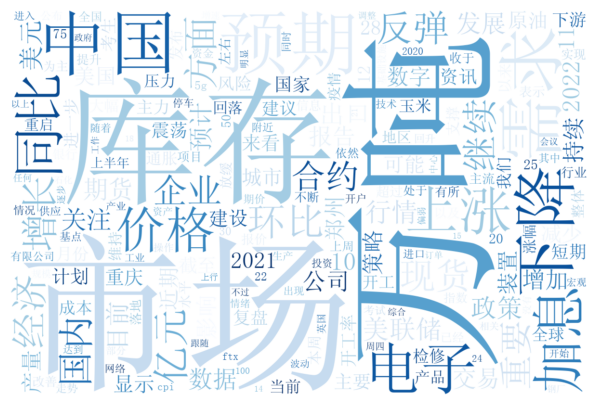

In [ ]:
# Import the WordCloud class from the wordcloud library, which is used to generate word clouds.
from wordcloud import WordCloud
# Import the pyplot module from matplotlib, which provides functions for creating various visualizations.
import matplotlib.pyplot as plt
# Import the matplotlib library, which is a comprehensive library for creating visualizations.
import matplotlib

# Get the file path of the DejaVu Sans font. Note that this variable is not used later in the code.
default_font_path = matplotlib.font_manager.FontProperties(family='DejaVu Sans').get_file()

# Create a WordCloud object and configure its parameters.
# width=1200 and height=800: Set the width and height of the word cloud image.
# max_words=200: Specify the maximum number of words to display in the word cloud.
# colormap='Blues': Set the color scheme of the word cloud to blue.
# background_color='white': Set the background color of the word cloud to white.
# font_path='SimSun.ttf': Specify the font file to use for the text in the word cloud.
# generate_from_frequencies(word_freq): Generate a word cloud based on the word frequencies in the word_freq variable.
wc = WordCloud(
    width=1200,
    height=800,
    max_words=200,
    colormap='Blues',
    background_color='white',
    font_path='SimSun.ttf'
).generate_from_frequencies(word_freq)

# The following line is commented out. If uncommented, it sets the default sans-serif font to Arial Unicode MS.
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# Create a new figure with a width of 10 inches and a height of 5 inches.
plt.figure(figsize=(10,5))
# Display the word cloud image. The interpolation='bilinear' parameter is used to smooth the image.
plt.imshow(wc, interpolation='bilinear')
# Hide the axis of the plot.
plt.axis('off')
# Display the plot.
plt.show()